In [3]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


Exercise 1 - modelling height of !Kung people

task 1 - Prior predictive checks

In [4]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [5]:
model_ppc=CmdStanModel(stan_file=r"C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_1_ppc.stan")

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [6]:
model_1_fit=CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [7]:
fit=model_1_fit.sample(data=dict(N=len(d), heights=d.height.values), seed=28052020)
mu_fit = fit.stan_variable('mu')
sigma_fit=fit.stan_variable('sigma')
height_pred=fit.stan_variable('height')

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


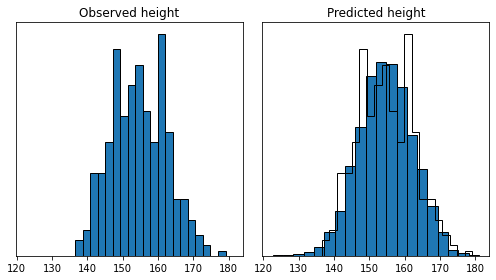

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4),sharex=True,sharey=True)
ax=axes[0]
ax.hist(d.height,bins=20,edgecolor='k',density=True)
ax.set_title('Observed height')
ax.set_yticks(())
ax2=axes[1]
ax2.hist(height_pred,bins=20,edgecolor='k',density=True)
ax2.hist(d.height,bins=20,histtype='step',color='black',density=True)
ax2.set_title('Predicted height')
ax2.set_yticks(())
fig.tight_layout()
plt.show()

task 3

In [9]:
d["weight"].mean()
d.insert(3, "c_weight", (d["weight"]-d["weight"].mean()), True)
d.head()

,height,weight,age,c_weight,male
0,151.765,47.825606,63.0,2.835121,1
1,139.700,36.485807,63.0,-8.504679,0
2,136.525,31.864838,65.0,-13.125648,0
3,156.845,53.041914,41.0,8.051429,1
4,145.415,41.276872,51.0,-3.713614,0


In [10]:
model_ppc=CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_2a_pcc.stan')
R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


task 4

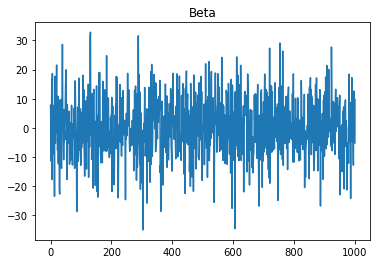

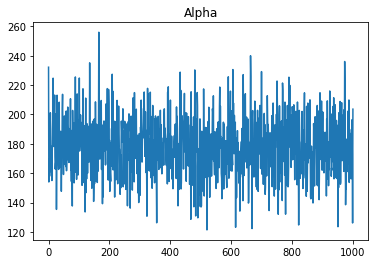

In [11]:
beta = sim.stan_variable('beta')
alpha = sim.stan_variable('alpha')
plt.plot(np.linspace(0,1000,1000),beta, linestyle='-')
plt.title('Beta')
plt.show()
plt.plot(np.linspace(0,1000,1000),alpha, linestyle = '-')
plt.title('Alpha')
plt.show()


In [13]:
model_ppc=CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_2b_pcc.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_2b_pcc.stan to exe file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_2b_pcc.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_2b_pcc.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/Lab4/height_2b_pcc.hpp C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/Lab4/height_2b_pcc.stan
Warning in 'C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/Lab4/height_2b_pcc.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/Lab4/height_2b_pcc.stan', line 10, column 3: Declaration
   

In [14]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


Task 5

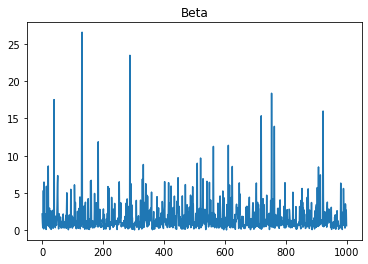

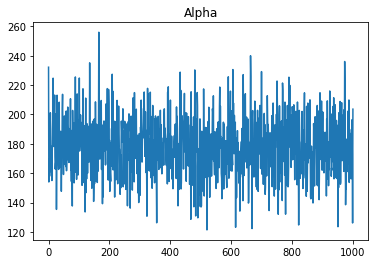

In [15]:
beta = sim.stan_variable('beta')
alpha = sim.stan_variable('alpha')
plt.plot(np.linspace(0,1000,1000), beta, linestyle='-')
plt.title('Beta')
plt.show()
plt.plot(np.linspace(0,1000,1000), alpha , linestyle = '-')
plt.title('Alpha')
plt.show()

In [16]:
print(sim.column_names)

('lp__', 'accept_stat__', 'alpha', 'beta', 'sigma', 'height[1]', 'height[2]', 'height[3]', 'height[4]', 'height[5]', 'height[6]', 'height[7]', 'height[8]', 'height[9]', 'height[10]', 'height[11]', 'height[12]', 'height[13]', 'height[14]', 'height[15]', 'height[16]', 'height[17]', 'height[18]', 'height[19]', 'height[20]', 'height[21]', 'height[22]', 'height[23]', 'height[24]', 'height[25]', 'height[26]', 'height[27]', 'height[28]', 'height[29]', 'height[30]', 'height[31]', 'height[32]', 'height[33]', 'height[34]', 'height[35]', 'height[36]', 'height[37]', 'height[38]', 'height[39]', 'height[40]', 'height[41]', 'height[42]', 'height[43]', 'height[44]', 'height[45]', 'height[46]', 'height[47]', 'height[48]', 'height[49]', 'height[50]')


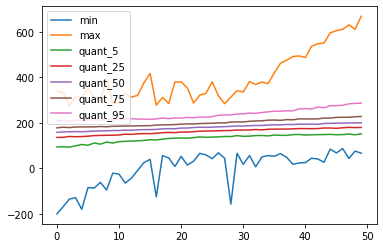

In [17]:
height_columns = sim.draws_pd()
height_columns = height_columns.loc[:, 'height[1]':]

min_weights = []
max_weights = []
quant_5 = []
quant_25 = []
quant_50 = []
quant_75 = []
quant_95 = []


for column in height_columns:

    min_weights.append(min(height_columns[column]))
    max_weights.append(max(height_columns[column]))
    quant_5.append(height_columns[column].quantile(.05))
    quant_25.append(height_columns[column].quantile(.25))
    quant_50.append(height_columns[column].quantile(.5))
    quant_75.append(height_columns[column].quantile(.75))
    quant_95.append(height_columns[column].quantile(.95))

plt.plot(min_weights, label = 'min')
plt.plot(max_weights, label = 'max')
plt.plot(quant_5, label = 'quant_5')
plt.plot(quant_25, label = 'quant_25')
plt.plot(quant_50, label = 'quant_50')
plt.plot(quant_75, label = 'quant_75')
plt.plot(quant_95, label = 'quant_95')
plt.legend()

In [19]:
model_2_fit=CmdStanModel(stan_file=r'C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_2_fit.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_2_fit.stan to exe file C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_2_fit.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Jaskier-PC\Desktop\semestr8\Data_analysis\Lab4\height_2_fit.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/Lab4/height_2_fit.hpp C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/Lab4/height_2_fit.stan
Warning in 'C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/Lab4/height_2_fit.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in 'C:/Users/Jaskier-PC/Desktop/semestr8/Data_analysis/Lab4/height_2_fit.stan', line 25, column 3: Declaration
    of arr

task 6

In [20]:
data_fit = {
    "N": 300,
    "weight": d["weight"][:300],
    "heights": d["height"][:300]
}

fit=model_2_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


task 7

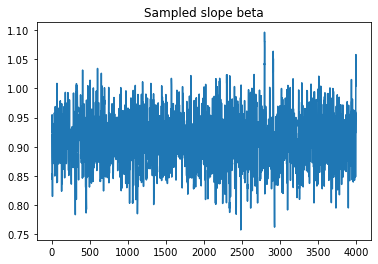

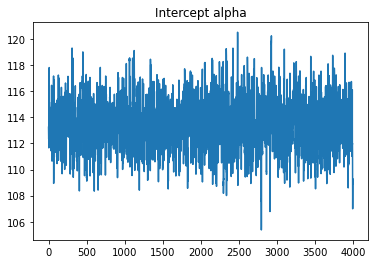

In [21]:
beta = fit.stan_variable('beta')
alpha = fit.stan_variable('alpha')

plt.plot(beta)
plt.title('Sampled slope beta')
plt.show()
plt.plot(alpha)
plt.title('Intercept alpha')
plt.show()

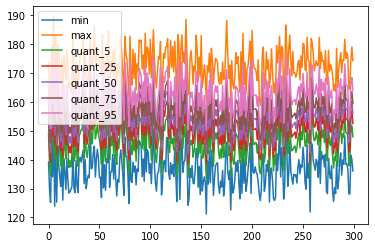

In [22]:
height_columns = fit.draws_pd()
height_columns = height_columns.loc[:, 'height[1]':]

min_weights = []
max_weights = []
quant_5 = []
quant_25 = []
quant_50 = []
quant_75 = []
quant_95 = []


for column in height_columns:

    min_weights.append(min(height_columns[column]))
    max_weights.append(max(height_columns[column]))
    quant_5.append(height_columns[column].quantile(.05))
    quant_25.append(height_columns[column].quantile(.25))
    quant_50.append(height_columns[column].quantile(.5))
    quant_75.append(height_columns[column].quantile(.75))
    quant_95.append(height_columns[column].quantile(.95))

plt.plot(min_weights, label = 'min')
plt.plot(max_weights, label = 'max')
plt.plot(quant_5, label = 'quant_5')
plt.plot(quant_25, label = 'quant_25')
plt.plot(quant_50, label = 'quant_50')
plt.plot(quant_75, label = 'quant_75')
plt.plot(quant_95, label = 'quant_95')
plt.legend()